## Fancy Indexing

Eber David Gaytan Medina

In the previous sections, we saw how to access and modify portions of arrays using simple indices (e.g., arr[0]), slices (e.g., arr[:5]), and Boolean masks (e.g., arr[arr > 0]). In this section, we'll look at another style of array indexing, known as fancy indexing. Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values.

In [ ]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)
[51 92 14 71 60 20 82 86 74 74]

In [ ]:
[x[3], x[7], x[2]]
[71, 86, 14]
#Alternatively, we can pass a single list or array of indices to obtain the same result:

ind = [3, 7, 4]
x[ind]
array([71, 86, 60])

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]
array([[71, 86],
       [60, 20]])
#Fancy indexing also works in multiple dimensions. Consider the following array:

X = np.arange(12).reshape((3, 4))
X
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]
array([ 2,  5, 11])

In [ ]:
X[row[:, np.newaxis], col]
array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])
#Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations. For example:

row[:, np.newaxis] * col
array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [ ]:
#Combined Indexing
#For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

print(X)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
#We can combine fancy and simple indices:

X[2, [2, 0, 1]]
array([10,  8,  9])
#We can also combine fancy indexing with slicing:

X[1:, [2, 0, 1]]
array([[ 6,  4,  5],
       [10,  8,  9]])
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]
array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [ ]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape
(100, 2)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

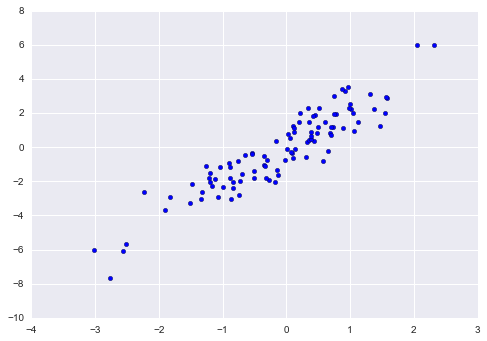

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

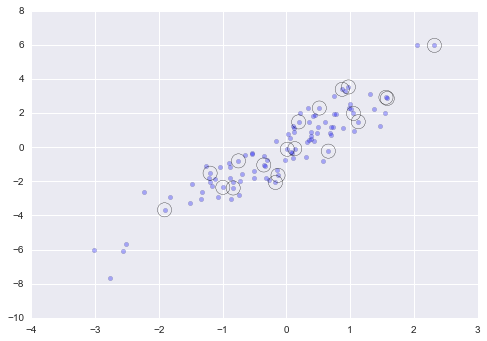

In [ ]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)
[ 0 99 99  3 99  5  6  7 99  9]
We can use any assignment-type operator for this. For example:

x[i] -= 10
print(x)
[ 0 89 89  3 89  5  6  7 89  9]
Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)
[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

In [ ]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x
array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)
[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]

In [ ]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)
# plot the results
plt.plot(bins, counts, linestyle='steps');

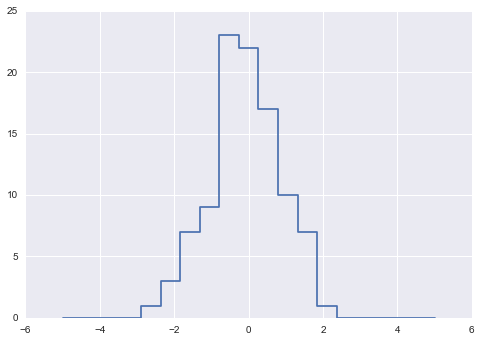

In [ ]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)
NumPy routine:
10000 loops, best of 3: 97.6 µs per loop
Custom routine:
10000 loops, best of 3: 19.5 µs per loop

In [ ]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)
NumPy routine:
10 loops, best of 3: 68.7 ms per loop
Custom routine:
10 loops, best of 3: 135 ms per loop